这是球谐函数

$$
Y_{\ell}^{m}(\theta, \phi)=(-1)^{m} \sqrt{\frac{(2 \ell+1)}{4 \pi} \frac{(\ell-m) !}{(\ell+m) !}} P_{\ell}^{m}(\cos \theta) e^{i m \phi}
$$

可以看到最后一项 $e^{i m \phi}$ 表征着球谐函数在 $\phi$ 方向的周期性变化，当 $m=0$ 的时候，在 $\phi$ 方向没有变化，当 $m=\ell$ 的时候，沿着 $\phi$ 方向的变化最剧烈，每隔 $\pi/\ell$ 的角度，球谐函数值的符号的正负就会发生改变。

再来看连带勒让德多项式（[Associated Legendre polynomial](https://en.wikipedia.org/wiki/Associated_Legendre_polynomials)）这一项，根据维基百科

$$
P_{l}^{m}(x)=(-1)^{m} \cdot 2^{l} \cdot\left(1-x^{2}\right)^{m / 2} \cdot \sum_{k=m}^{l} \frac{k !}{(k-m) !} \cdot x^{k-m} \cdot\begin{pmatrix} l \\ k \end{pmatrix}
\begin{pmatrix} \frac{l+k-1}{2} \\ l \end{pmatrix}
$$

当 $x=\cos\theta$ 时，$(1-\cos^2\theta)^{m/2}$ 并不会改变多项式的正负，使多项式发生正负变化的是后面求和的那一项，且当 $m=\ell$ 的时候，求和那一项不再有周期变化，$P_\ell^m$ 在沿着 $\theta$ 方向是不存在周期变化的。我并不会具体推导球谐变换在平天近似下的极限，只是通过编程感受一下这个极限，先画一些 $P_\ell^m(\cos\theta)$ 来看看！


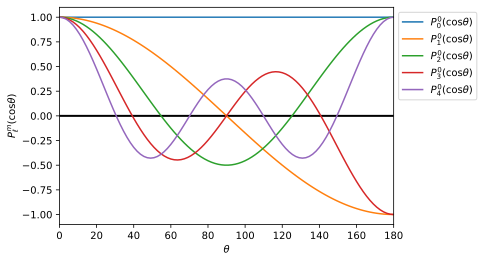

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from scipy.special import lpmv
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0,180,100)
m = 0

fig, ax = plt.subplots()
ax.axhline(0, lw=2, c='k')
for l in range(5):
    pmv = lpmv(m, l, np.cos(theta * np.pi / 180))
    ax.plot(theta, pmv, label=r'$P_{%d}^0(\cos\theta)$' % l)

ax.legend(bbox_to_anchor=(1, 1), loc=0)
ax.set_xlim([0, 180])
ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'$P_{\ell}^m(\cos\theta)$')
plt.show()

可以发现，不同的 $\ell$ 值下，$\theta$ 被分成了 $\ell+1$ 个区间，每个区间的大小近似于 $\pi/(\ell+1)$ 但又不是完全相等，但是可以猜想当 $\ell$ 越来越大的时候，我们也许会发现每个区间之间的差距变小了。

$$
\frac{1}{\ell+1}\sum_{i=1}^{\ell+1}\left(\frac{\Delta_{\ell,i}-\bar{\Delta}_{\ell}}{\bar{\Delta}_\ell}\right)^2\\
\bar{\Delta}_\ell=\frac{\pi}{\ell+1}
$$

画出第一式随 $\ell$ 的变化，其中 $\theta_{\ell,i}$ 是 $P_\ell^0(\cos\theta)$ 每一个区间的长度

In [32]:
from scipy.optimize import fsolve
from tqdm import tqdm
ls = []
sigma_rs = []

for l in tqdm(range(2,2000)):
    f = lambda theta: lpmv(m, l, np.cos(theta * np.pi / 180))
    fs = [0.]
    for theta in np.linspace(0, 180, l+2)[1:-1]:
        fs.append(fsolve(f, theta)[0])
    fs += [180.]
    delta = np.array(fs)[1:] - np.array(fs)[:-1]
    delta_mean = 180 / (l+1)
    sigma_r = np.mean((delta / delta_mean - 1)**2)
    # save
    ls.append(l)
    sigma_rs.append(sigma_r)

100%|██████████| 1998/1998 [04:33<00:00,  7.29it/s]


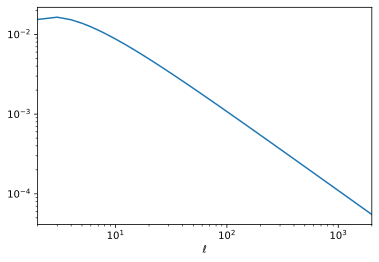

In [36]:
fig, ax = plt.subplots()
ax.plot(ls, sigma_rs)
ax.set_xlabel('$\ell$')
ax.set_xlim([2, 2000])
ax.loglog()
plt.show()

可以明显看到，当 $\ell$ 逐渐增大，相对误差是越来越小的，不同区间的长度相差的越来越小，和理论值 $\pi/(\ell+1)$ 越来越接近，$\ell$越大，就越可以忽略 $\ell$ 和 $\ell+1$ 的区别，所以当我们在做平天近似的时候，$k=2\pi\ell$ 的假设应当是非常安全的。